In [4]:
import pandas as pd

In [5]:
# Add Data into app
premier_league_url = "https://fbref.com/en/comps/13/2022-2023/2022-2023-Ligue-1-Stats"

# Only want to keep the first dataframe and the columns indicated below
prem_league_df = pd.read_html(premier_league_url)[0]
prem_columns = ["Rk", "Squad", "MP", "W", "L", "GF", "GA", "GD", "Pts", "Top Team Scorer", "Notes"]
prem_df = prem_league_df[prem_columns]
prem_df.to_csv('./data/France2022-2023.csv', index=False)

In [6]:
df = pd.read_csv('./data/ChampionsLeagueData.csv').dropna()[['Season', 'Champion', 'Runner-Up', 'Top Scorer']]
df.head()

,Season,Champion,Runner-Up,Top Scorer
1,2023-2024,Real Madrid,Dortmund,"Harry Kane, Kylian Mbappé - 8"
2,2022-2023,Manchester City,Internazionale,Erling Haaland - 12
3,2021-2022,Real Madrid,Liverpool,Karim Benzema - 15
4,2020-2021,Chelsea,Manchester City,Erling Haaland - 10
5,2019-2020,Bayern Munich,Paris Saint-Germain,Robert Lewandowski - 15


In [7]:
# Add champions league data to the analysis
champions_league_url = "https://fbref.com/en/comps/8/history/Champions-League-Seasons"

# Only want to keep the first dataframe and the columns indicated below
champions_league_df = pd.read_html(champions_league_url)[0]
champions_columns = ["Season", "Champion", "Runner-Up", "Top Scorer"]
champions_df = champions_league_df[champions_columns]
champions_df.to_csv('./data/ChampionsLeagueData.csv')

In [8]:
df = pd.read_csv('./data/ChampionsLeagueData.csv')[['Season', 'Champion', 'Runner-Up', 'Top Scorer']]
df.head()

,Season,Champion,Runner-Up,Top Scorer
0,2024-2025,NaN,NaN,NaN
1,2023-2024,Real Madrid,Dortmund,"Harry Kane, Kylian Mbappé - 8"
2,2022-2023,Manchester City,Internazionale,Erling Haaland - 12
3,2021-2022,Real Madrid,Liverpool,Karim Benzema - 15
4,2020-2021,Chelsea,Manchester City,Erling Haaland - 10


In [9]:
d = {}
for team in df['Champion'].dropna().to_list():
    if team in d:
        d[team] += 1
    else:
        d[team] = 1

C:\Users\arnav\AppData\Local\Temp\ipykernel_39448\2416288286.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Wins', y='Team', data=data, palette=palette)


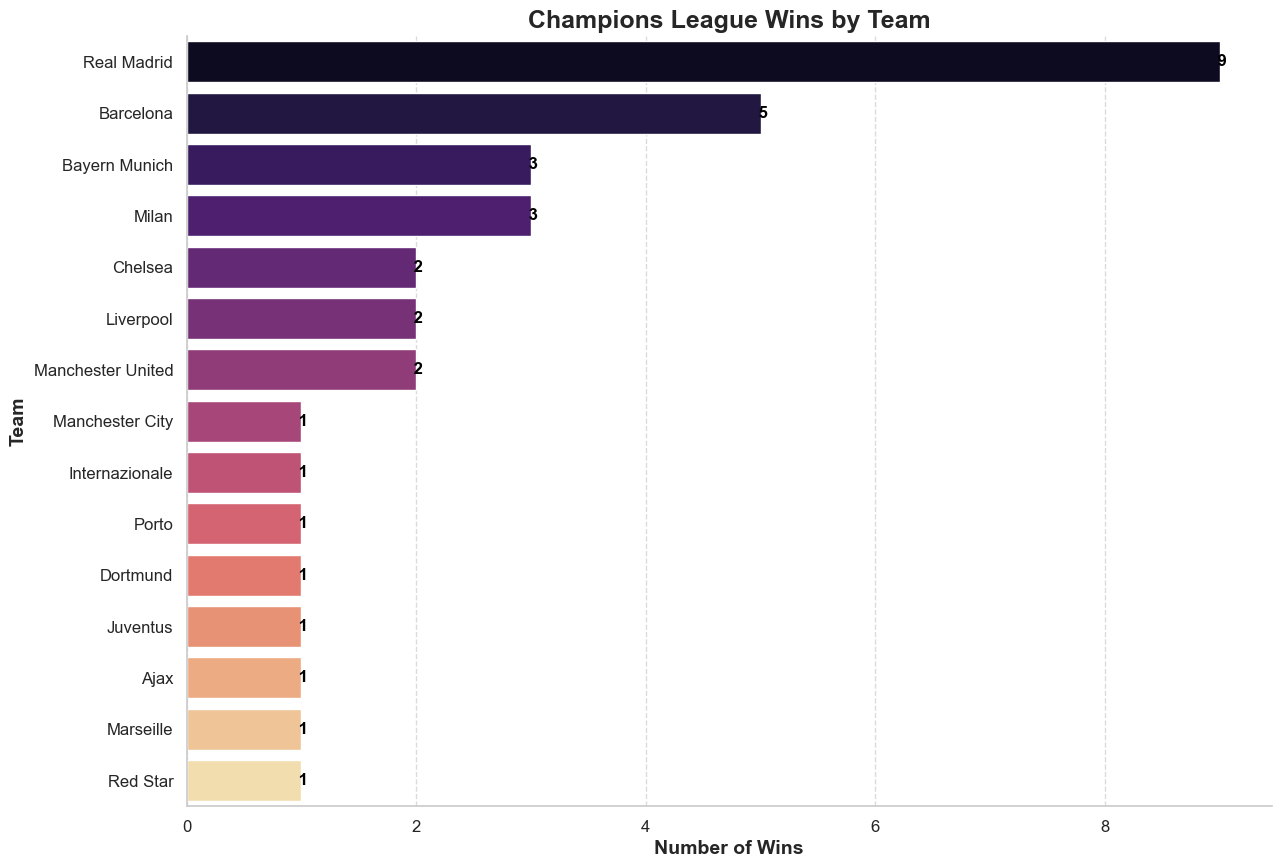

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the dictionary to a DataFrame
data = pd.DataFrame(list(d.items()), columns=['Team', 'Wins'])

# Sort the DataFrame by the number of wins
data = data.sort_values(by='Wins', ascending=False)

# Create the Seaborn bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Wins', y='Team', data=data, palette='viridis')

# Add title and labels
plt.title('Champions League Wins by Team', fontsize=16)
plt.xlabel('Number of Wins', fontsize=14)
plt.ylabel('Team', fontsize=14)

# Show the plot
plt.show()


In [29]:
def analyzeSeason():
    return

england = pd.read_csv('data/England2023-2024.csv')
england

,Unnamed: 0,Rk,Squad,MP,W,L,GF,GA,GD,Pts,Top Team Scorer,Notes
0,0,1,Manchester City,38,28,3,96,34,62,91,Erling Haaland - 27,→ Champions League via league finish
1,1,2,Arsenal,38,28,5,91,29,62,89,Bukayo Saka - 16,→ Champions League via league finish
2,2,3,Liverpool,38,24,4,86,41,45,82,Mohamed Salah - 18,→ Champions League via league finish
3,3,4,Aston Villa,38,20,10,76,61,15,68,Ollie Watkins - 19,→ Champions League via league finish
4,4,5,Tottenham,38,20,12,74,61,13,66,Son Heung-min - 17,→ Europa League via league finish
5,5,6,Chelsea,38,18,11,77,63,14,63,Cole Palmer - 22,→ Europa League via league finish
6,6,7,Newcastle Utd,38,18,14,85,62,23,60,Alexander Isak - 21,→ Europa Conference League via league finish
7,7,8,Manchester Utd,38,18,14,57,58,-1,60,"Rasmus Højlund, Bruno Fernandes - 10",NaN
8,8,9,West Ham,38,14,14,60,74,-14,52,Jarrod Bowen - 16,NaN
9,9,10,Crystal Palace,38,13,15,57,58,-1,49,Jean-Philippe Mateta - 16,NaN
